## This homework was done by Hamza JIDAL  #115024

### Supervised by Pr. Mehdi Zakroum

In [3]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

%matplotlib inline

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached grpcio-1.64.0-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)


In [27]:
def plot_loss(history):
    """
    history: history object returned by keras fit method
    """
    plt.figure()
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.show()

### Splitting the dataset into training and test sets

In [28]:
tf.keras.backend.set_image_data_format('channels_last')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = x_train / 255.
x_test = x_test / 255.

# Define the labels for the binary classification
def convert_to_binary_class(y):
    # Classes 0 (airplane) and 2 (bird) can fly, all others cannot
    return np.where(np.isin(y, [0, 2]), 1, 0)

y_train_binary = convert_to_binary_class(y_train)
y_test_binary = convert_to_binary_class(y_test)

print(x_train.shape, y_train_binary.shape, x_test.shape, y_test_binary.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### Designing the CNN model

In [29]:
# Build and compile the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.005), 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 16)       │         9,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 4, 4, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,553 (131.07 KB)

 Trainable params: 33,201 (129.69 KB)

 Non-trainable params: 352 (1.38 KB)

None


In [30]:
x_train.shape

(50000, 32, 32, 3)

### Training the model

In [31]:
history = model.fit(x_train, y_train_binary, epochs=100, batch_size=32, validation_split=0.15)

Epoch 1/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.7601 - loss: 0.5206 - val_accuracy: 0.8240 - val_loss: 0.4283
Epoch 2/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.8276 - loss: 0.4095 - val_accuracy: 0.8175 - val_loss: 0.5245
Epoch 3/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.8353 - loss: 0.3860 - val_accuracy: 0.8128 - val_loss: 0.4650
Epoch 4/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.8456 - loss: 0.3675 - val_accuracy: 0.8413 - val_loss: 0.3786
Epoch 5/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.8536 - loss: 0.3530 - val_accuracy: 0.8556 - val_loss: 0.3474
Epoch 6/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8556 - loss: 0.3439 - val_accuracy: 0.8736 - val_loss: 0.3207
Epoch 7/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8623 - loss: 0.3362 - val_accuracy: 0.8455 - val_loss: 0.3502
Epoch 8/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 

Epoch 50/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.8948 - loss: 0.2627 - val_accuracy: 0.8896 - val_loss: 0.2678
Epoch 51/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8924 - loss: 0.2658 - val_accuracy: 0.8883 - val_loss: 0.2753
Epoch 52/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.8939 - loss: 0.2655 - val_accuracy: 0.9073 - val_loss: 0.2368
Epoch 53/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.8933 - loss: 0.2618 - val_accuracy: 0.8815 - val_loss: 0.2990
Epoch 54/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.8921 - loss: 0.2666 - val_accuracy: 0.8808 - val_loss: 0.2898
Epoch 55/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8912 - loss: 0.2651 - val_accuracy: 0.8969 - val_loss: 0.2620
Epoch 56/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.8929 - loss: 0.2618 - val_accuracy: 0.8935 - val_loss: 0.2698
Epoch 57/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - ac

Epoch 99/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.8987 - loss: 0.2505 - val_accuracy: 0.9132 - val_loss: 0.2301
Epoch 100/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8977 - loss: 0.2562 - val_accuracy: 0.8993 - val_loss: 0.2538


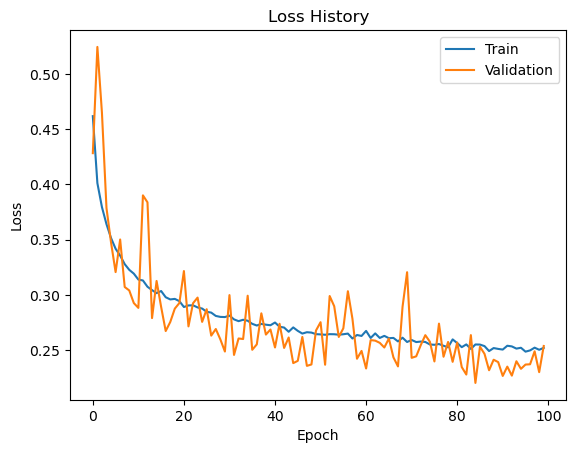

In [32]:
plot_loss(history)

### Evaluation

In [33]:
# model evaluation
model.evaluate(x_test, y_test_binary)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8929 - loss: 0.2621


[0.25786691904067993, 0.8949999809265137]

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# calculating metrics

precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)
accuracy = accuracy_score(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)

In [43]:
# print metrics

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Precision: 0.7540
Recall: 0.7050
F1 Score: 0.7287
Accuracy: 0.8950
Confusion Matrix:
[[7540  460]
 [ 590 1410]]


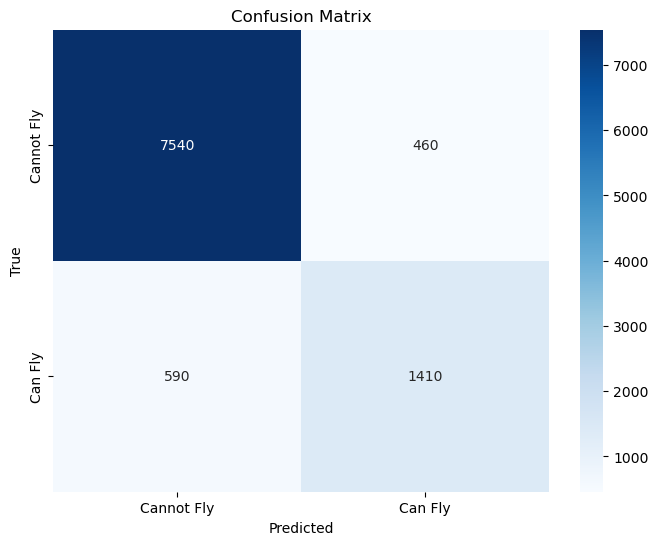

In [45]:
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cannot Fly", "Can Fly"], yticklabels=["Cannot Fly", "Can Fly"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Bonus

In [49]:
# we adapt the input image to the CIFAR10 Dataset

from skimage.transform import resize
def preprocess_image(img_path):
    img = imread(img_path)
    img = resize(img, (32, 32))  
    img = img.astype(np.float32) / 255.0 
    img = np.expand_dims(img, axis=0)  
    return img

def predict_image(model, img_array):
    prediction_prob = model.predict(img_array)
    prediction = (prediction_prob > 0.5).astype(int).flatten()
    return prediction, prediction_prob

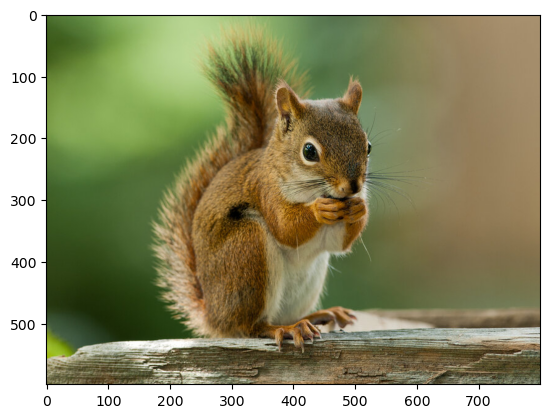

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The object in the image cannot fly


0.13637097

In [61]:
# we test on new image

img = imread('squirrel.jpg')
plt.figure()
plt.imshow(img)
plt.show()
img_array = preprocess_image('squirrel.jpg')
prediction, prediction_prob = predict_image(model, img_array)
if prediction[0] == 1:
    print(f'The object in the image can fly')
else:
    print(f'The object in the image cannot fly')
prediction_prob[0][0]